# TiNNy - Regression Demo

Welcome to our TiNNy regression demo, where we delve into real estate data analysis using the Boston house prices dataset. This demonstration showcases the application of regression techniques to predict housing prices.

Dan B. (2018). Housing Prices Competition for Kaggle Learn Users. Kaggle. https://kaggle.com/competitions/home-data-for-ml-course

In [1]:
# Import modules

import tinny
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

/home/pablospilab/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Data loading and preparation

In [2]:
data_train = pd.read_csv('./data/regression/boston.csv').values

m, n = data_train.shape

X_train = data_train[:, :-1]  
y_train = data_train[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=400, random_state=42)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train).T
X_test = scaler_X.transform(X_test).T

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).T
y_test = scaler_y.transform(y_test.reshape(-1, 1)).T

## Creating a TiNNy Network

Building a TiNNy network involves defining its architecture by specifying the layers that make it up. Here’s how you can effortlessly construct your network:

1. Layer Specifications: Each layer within the network requires three key pieces of information:
    - The number of inputs it will receive.
    - The number of neurons (or units) it contains.
    - The activation function to apply to its outputs.

2. Layer Types: Our network can incorporate both Dense layers and an Output layer. For this demonstration:
    - Dense Layer: We will utilize the ReLU (Rectified Linear Unit) activation function, configuring this layer with 26 neurons each.
    - Output Layer: Given the regression, non-negative nature of our problem, the ReLU activation function is employed to handle the output layer effectively.

3. Network Configuration: To finalize the TiNNy network setup, we specify:
    - The type of problem we are addressing (either regression or classification).
    - The loss function to optimize during training.
    - The layers that constitute the network architecture.

In [15]:
l1 = tinny.DenseLayer(13, 26, "ReLU")
l2 = tinny.OutputLayer(26, 1, "ReLU")
nn = tinny.TiNNyNetwork(problem_type="regression", loss_function="mse", layers=[l1, l2])

### Visualizing the TiNNy Network

To visualize the architecture of our TiNNy network, employ the `render()` method. This functionality provides a graphical representation of the network's structure, showcasing the configured layers.

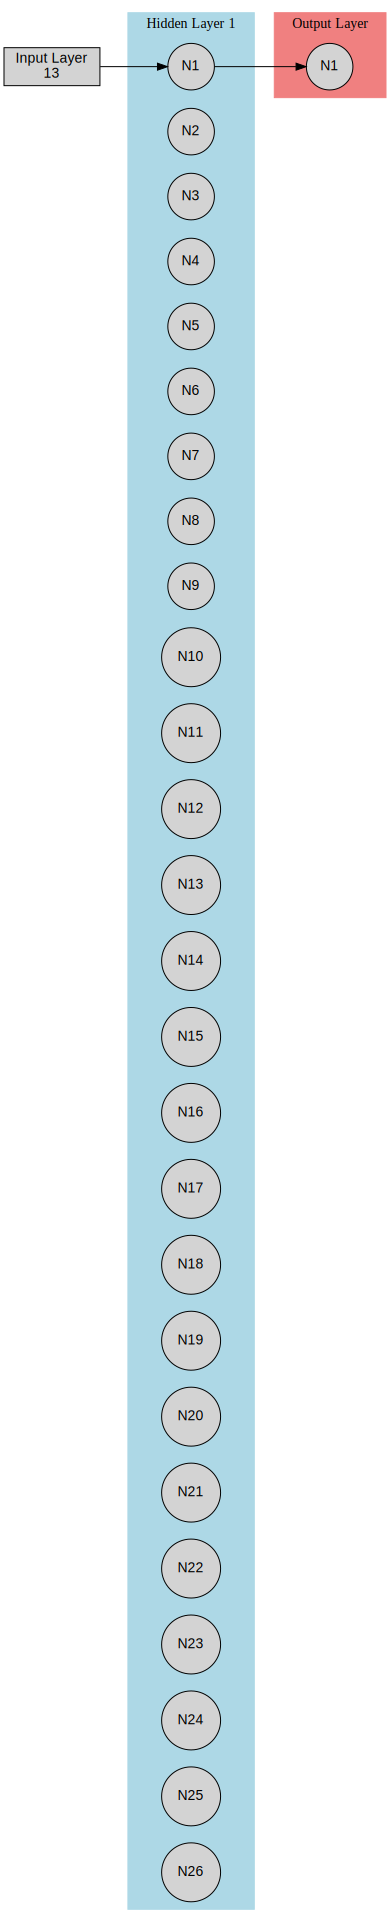

In [16]:
nn.render()

## Training and Testing Our Network

Training our neural network involves specifying the number of epochs (iterations) and setting the learning rate, which are crucial parameters that influence the model's convergence and performance. 

Upon testing our neural network, visualizing the performance becomes essential. One effective method is plotting the scatter plot. This visualization maps the predicted values against the actual values, offering a clear visual representation of the model's precision. In an ideal scenario, the data points will align closely with the diagonal line, indicating high accuracy in continuous value predictions.

Iteration 0
Loss: 0.21263584922509682
Iteration 10
Loss: 0.05878234559132753
Iteration 20
Loss: 0.04061234475760961
Iteration 30
Loss: 0.03194924976149394
Iteration 40
Loss: 0.026860797928444077
Iteration 50
Loss: 0.023801642915617798
Iteration 60
Loss: 0.021632451843002606
Iteration 70
Loss: 0.019970802051042017
Iteration 80
Loss: 0.01864506159147004
Iteration 90
Loss: 0.01751777193243548
Iteration 100
Loss: 0.016601797115332394
Iteration 110
Loss: 0.01583681053177722
Iteration 120
Loss: 0.015188555228466627
Iteration 130
Loss: 0.014641200652394463
Iteration 140
Loss: 0.014158927084153651
Iteration 150
Loss: 0.013781493729628544
Iteration 160
Loss: 0.013478172383554794
Iteration 170
Loss: 0.013212567352978655
Iteration 180
Loss: 0.012974159405376723
Iteration 190
Loss: 0.012755391888245884
Iteration 200
Loss: 0.012561190321284707
Iteration 210
Loss: 0.012385797963740675
Iteration 220
Loss: 0.012221045456067434
Iteration 230
Loss: 0.012070586782084778
Iteration 240
Loss: 0.011930191994

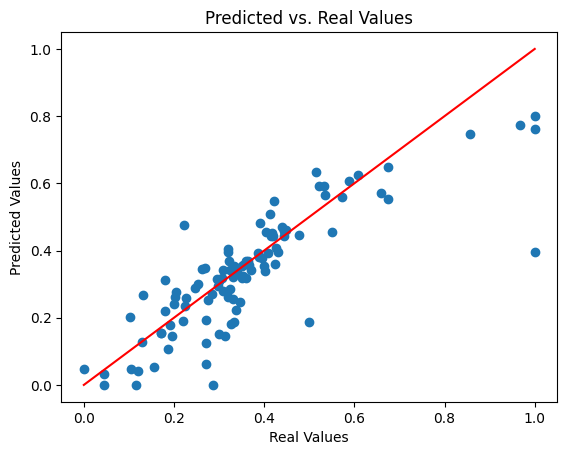

In [17]:
nn.train(X_train, y_train, iterations=350, learning_rate=0.005)
nn.test(X_test, y_test, plot=True)